In [1]:
# 10.워드 임베딩 03) 영어/한국어 Word2Vec 실습을 Scrapy로 crawl한 데이터로 진행해보자

import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [2]:
data = pd.read_csv('./tutorial/moviesEX.csv')

In [3]:
print(len(data))
print(data[:5])

335915
                                               reple
0                                     엠마들이 다 해 먹는 영화
1  재미있네요 조커와는 다른 매력적인 악당입니다. 조커는 밑바닥으로 추락하면서 빌런이 ...
2               엠마스톤한테 잘 어울리는 캐릭터.. 소름 돋을 정도로 예쁘다...
3  딱히 기대는 안 하고 봤는데 상상 그 이상으로 너무 재밌었음.. 다시 보러갈 의향도...
4                                    크루엘라 이제 내 최애캐릭터


In [4]:
data['reple'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
335910    False
335911    False
335912    False
335913    False
335914    False
Name: reple, Length: 335915, dtype: bool

In [5]:
data['reple'].isnull().sum()

18079

In [6]:
data.dropna()

,reple
0,엠마들이 다 해 먹는 영화
1,재미있네요 조커와는 다른 매력적인 악당입니다. 조커는 밑바닥으로 추락하면서 빌런이 ...
2,엠마스톤한테 잘 어울리는 캐릭터.. 소름 돋을 정도로 예쁘다...
3,딱히 기대는 안 하고 봤는데 상상 그 이상으로 너무 재밌었음.. 다시 보러갈 의향도...
4,크루엘라 이제 내 최애캐릭터
...,...
335910,팬심 빼고 객관적으로 말합니다. 타임머신 스토리는 함부로 다루면 안됨. 이 영화도 ...
335911,단체달리기 미쳤냐? 날아가는 놈들은 타노스랑 먼저 싸우기싫어서 저속비행하는거냐? ...
335912,ㅇ
335913,이게 재밌음? 유치함.. 좋아하는사람만보샘


In [7]:
data['reple'].isnull().sum()

18079

In [8]:
#null값 제거
data.dropna(inplace=True)

In [9]:
data['reple'].isnull().sum()

0

In [10]:
len(data), data['reple'].nunique()

(317836, 311490)

In [11]:
#중복값 제거
data.drop_duplicates(inplace=True)
len(data)

311490

In [12]:
# 정규표현식을 통한 한글 외 문자 제거
train_data = data['reple'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","",regex=True)

In [13]:
len(train_data)

311490

In [14]:
#불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [15]:
# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()
tokenized_data = []
for sentence in train_data:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

리뷰의 최대 길이 : 64
리뷰의 평균 길이 : 9.436020417990946


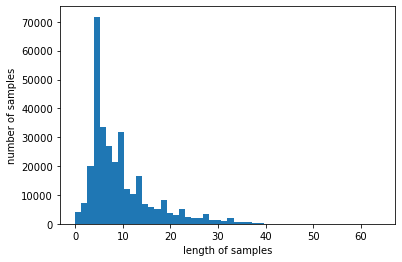

In [16]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [18]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [19]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(11807, 100)

In [20]:
print(model.wv.most_similar("디즈니"))

[('디지다', 0.8413909673690796), ('픽사', 0.8164016008377075), ('월트디즈니', 0.6693775057792664), ('애니', 0.5615917444229126), ('겨울왕국', 0.5138360261917114), ('애니메이션', 0.49241429567337036), ('메이드', 0.4884139895439148), ('실사', 0.48377975821495056), ('애니매이션', 0.4785113036632538), ('갓즈니', 0.47458529472351074)]


In [21]:
print(model.wv.most_similar("영웅"))

[('히어로', 0.8595595359802246), ('슈퍼히어로', 0.7690877914428711), ('인물', 0.6492668390274048), ('등장인물', 0.5758699178695679), ('악당', 0.5572696924209595), ('캐릭', 0.5161684155464172), ('캡틴', 0.5139737129211426), ('어벤져스', 0.4980274736881256), ('재료', 0.4913104772567749), ('복선', 0.48683804273605347)]


In [22]:
print(model.wv.most_similar("울컥"))

[('눈물나다', 0.807034432888031), ('오열', 0.705758810043335), ('울다', 0.6723195314407349), ('찡하다', 0.6309906244277954), ('눈물', 0.627592921257019), ('뭉클하다', 0.6202914118766785), ('벅차오르다', 0.6090335845947266), ('울컥울컥', 0.6012942790985107), ('코끝', 0.5897082686424255), ('벅차다', 0.5881829261779785)]


In [23]:
print(model.wv.most_similar("히어로"))

[('영웅', 0.8595595955848694), ('슈퍼히어로', 0.797484278678894), ('시리즈', 0.5520724058151245), ('미스터', 0.5481095314025879), ('땅불', 0.5206567645072937), ('액션영화', 0.5120751261711121), ('레즈', 0.49829408526420593), ('오른', 0.4870205521583557), ('어벤져스', 0.48303768038749695), ('장르', 0.4797782897949219)]


In [24]:
print(model.wv.most_similar("아이"))

[('딸아이', 0.7749825119972229), ('자녀', 0.7264703512191772), ('애', 0.7255581617355347), ('딸', 0.7199493050575256), ('아들', 0.7176122665405273), ('조카', 0.7077094912528992), ('어린이', 0.6950260400772095), ('여자아이', 0.6702176928520203), ('애기', 0.6433129906654358), ('아기', 0.6207179427146912)]


In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_data)

word2idx = tokenizer.word_index
idx2word = {v:k for k, v in word2idx.items()}
encoded = tokenizer.texts_to_sequences(tokenized_data)

In [29]:
print(encoded[:2])

[[432, 14, 307, 224, 2], [9, 2462, 1735, 282, 266, 17, 51, 715, 6, 2462, 10690, 8168, 775, 21, 710, 717, 3795, 7, 764, 775, 21]]


In [30]:
vocab_size = len(word2idx) + 1 
print('단어 집합의 크기 :', vocab_size)

단어 집합의 크기 : 40187


In [35]:
from tensorflow.keras.models import load_model
loaded_model = load_model('Python/best_model.h5')

In [46]:
#오류 많지만 시도에 의의
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len = 64
for i in range(0,21):
  pad_new = pad_sequences([encoded[i]], maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  print(f"{tokenized_data[i]}는")
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

['엠마', '다', '해', '먹다', '영화']는
98.88% 확률로 부정 리뷰입니다.

['재미있다', '조커', '와는', '다른', '매력', '적', '인', '악당', '이다', '조커', '밑바닥', '추락', '빌런', '되다', '크루', '엘라', '정상', '을', '찍다', '빌런', '되다']는
95.11% 확률로 긍정 리뷰입니다.

['엠마', '스톤', '한테', '자다', '어울리다', '캐릭터', '소름', '돋다', '정도', '로', '예쁘다']는
57.78% 확률로 긍정 리뷰입니다.

['딱하다', '기대다', '안', '보다', '상상', '그', '이상', '너무', '재밌다', '다시', '보다', '갈다', '의향', '있다', 'ㅇ', '달다']는
84.42% 확률로 긍정 리뷰입니다.

['크루', '엘라', '이제', '내', '최애', '캐릭터']는
70.95% 확률로 긍정 리뷰입니다.

['영화', '내내', '빌런', '스러운', '분위기', '좋다', '배우', '연기', '진짜']는
73.62% 확률로 긍정 리뷰입니다.

['그냥', '미치다', '뭐', '하나', '빠지다', '없다', '마리', '달마시안', '팬', '영화', '끝나다', '같다', '나가다', '일단', '앉다', 'ㅋㅋㅋㅋ']는
62.45% 확률로 부정 리뷰입니다.

['웃기다', '별', '점', '점', '준', '애', '너', '이름', '전부', '점', '주다', 'ㅋ', '신카이', '마코토', '나다', '좋아하다', '영화', '그', '영화', '랑', '비교', '별', '개', '짜다', '리', '아니다', '같다']는
98.92% 확률로 부정 리뷰입니다.

['남녀', '노소', '누가', '보다', '명작', '믿다', '보다', '디즈니']는
72.22% 확률로 긍정 리뷰입니다.

['혼', '모노', '왜', '별', '점', '테러']는
78.86% 확률로 부정 리뷰입니다.

['윌', '스미스'